In [169]:
import pandas as pd
import numpy as np

In [170]:
attributes = pd.read_csv("../project_data/finished_attributes_engineering.csv",names=['SiteID', 'PlotNo', 'CentralAssetID', "AttrHD52","AttrNameHD5","AttrHD41",
"AttrNameHD41",
"AttrHD39",
"AttrNameHD39",
"AttrHD57",
"AttrNameHD57",
"AttrHD51",
"AttrNameHD51",
"AttrHD76",
"AttrNameHD76",
"AttrHD14",
"AttrNameHD14",
"AttrHD06",
"AttrNameHD06",
"AttrHD13",
"AttrNameHD13",
"AttrHD16",
"AttrNameHD16",
"AttrHD17",
"AttrNameHD17",
"AttrHD07",
"AttrNameHD07",
"AttrHD19",
"AttrNameHD19",
"AttrXSP",
"AttrNameXSP",
"AttrHD05",
"AttrNameHD05",
"AttrHD04",
"AttrNameHD04","ExtractTimestamp"], header=None,index_col=False)

In [173]:
interventions = pd.read_csv("../project_data/interventions_dataset.csv",names=[
"JobID"
,"CentralAssetID"
,"SiteID"
,"PlotNo"
,"AssetTypeID"
,"LogNo"
,"EntryDateTime"
,"Notes"
,"JobTypeID"
,"JobTypeCode"
,"JobTypeName"
,"JobStatusID"
,"FloodHotspot"
,"JobStatusName"
,"PriorityID"
,"PriorityName"
,"ActualStartingDateTime"
,"ActualCompletionDateTime"
,"ActualCompletionYearMonth"
,"RouteID"
,"ParameterTypeID"
,"ParameterValueID"
,"IsDeletedFlag"
,"IsCurrentFlag"
,"ValidFromDateTime"
,"ValidToDateTime"
,"InsertedDateTime"
,"JobItemID"
,"SorItemID"
,"ExtractTimestamp"],header=None,index_col=False)

/home/tgraham/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [174]:
interventions.groupby("CentralAssetID",as_index=False)["JobID"].count()

,CentralAssetID,JobID
0,00000000001000000147,3
1,00000000001000000148,3
2,00000000001000000149,3
3,00000000001000000150,3
4,00000000001000000151,3
...,...,...
198251,DRGU/A66000703,12
198252,DRGU/A66000704,12
198253,DRGU/A66000705,13
198254,DRGU/A66000706,13


In [175]:
def formatting_failure_vs_maintenance(string): 
    if string.find("B") != -1:
        return 1
    else:
        return 0

interventions["Failure_or_Maintenance"] = interventions["JobTypeCode"].apply(formatting_failure_vs_maintenance)

def create_prefix(siteid):
    return siteid[0:4]

interventions["prefix"] = interventions["SiteID"].apply(create_prefix)

In [176]:
interventions = interventions[(interventions["IsCurrentFlag"]==1)&(interventions["IsDeletedFlag"]==0)]

In [177]:
interventions = interventions.groupby(['JobID', 'CentralAssetID','EntryDateTime','Notes','FloodHotspot', 'JobStatusName', 'PriorityID',
       'PriorityName','ActualCompletionDateTime', 'RouteID', 'ParameterTypeID',
       'ParameterValueID', 'ExtractTimestamp', 'Failure_or_Maintenance'],as_index=False)["ValidFromDateTime"].max()

In [178]:
interventions.drop(columns="ValidFromDateTime",inplace=True)

In [179]:
interventions

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance
0,12000016,A12SDRGU00004594,2021-06-18 10:49:31.0000000,3 x blocked gully EB 1 x WB (DR: Blockage),0,Job Closed,24HR,24 Hours,2021-06-19 08:07:55.0000000,NO76,%FUL,7510,2023-04-21 10:59:09.627,1
1,12002351,A12GU00010060,2021-10-26 11:12:15.0000000,Sunken gully needs re-bedding to raise.,0,Job Closed,28DY,28 days,2021-11-09 04:03:52.0000000,NO96,%FUL,0-25,2023-04-21 10:59:09.627,1
2,12002726,A12GU00019535,2021-11-24 14:13:39.0000000,Gully grate collapsed lower than road (DR: Dra...,0,Work Complete,R,* Priority - Change Me,2021-11-24 14:18:34.0000000,NO87,%FUL,2550,2023-04-21 10:59:09.627,1
3,12002785,A12GU00011223,2021-11-29 12:23:36.0000000,1 sunken gully requires resetting in lane 1 M1...,0,Work Complete,28DY,28 days,2021-12-08 07:31:56.0000000,NO87,%FUL,NK,2023-04-21 10:59:09.627,1
4,12003189,A12GU00005763,2022-01-05 10:01:55.0000000,Clean test and prove gullies. Remove thermopla...,0,Work Complete,28DY,28 days,2022-07-26 01:01:43.0000000,NO41,%FUL,7510,2023-04-21 10:59:09.627,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568711,58156829,DR/HEA10/DRGU/043747,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:37:09.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0
568712,58156830,DR/HEA10/DRGU/043748,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Substantiation Passed,2MTH,2 Month - Commit,2023-04-02 22:36:46.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0
568713,58156831,DR/HEA10/DRGU/043746,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:37:33.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0
568714,58156832,DR/HEA10/DRGU/043718,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:54:58.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0


In [180]:
reactive_data = interventions[interventions["Failure_or_Maintenance"]==1].copy()
cyclic_data = interventions[interventions["Failure_or_Maintenance"]==0].copy()

In [181]:
key_words_covered = ["covered","leaves","Covered","Leaves","Clear","clear","CLEAR","cleared","CLEARED","clearing","cleaning","Cleaning","tops","top","mouth","mouths",
                     "debris","Debris","swept","Sweep","SWEPT","SWEEP","sweep","uncover","Uncover","grate","Obstruction","obstructed","detritus","Detritus","DETRITUS","Free flow impeded"]
key_words_full = ["empty","Empty","emptying","Emptying","gully cleaning","cleansing","cleaning out","jet","Jet","jetted","Jetted","Jetting","sucking","Sucking","sucker","SUCKER",
                 "sucked","Sucked","Suck","SUCK","suck","vac","blocked","Blocked","blockage","Blockage","unblock","Unblock","blocking","Blockage","Silt","silted","silt","Clean out gully"]
key_words_broken = ["collapsing","sunken","Collapsing","Sunken","Reset","reset","re-setting","Broken","broken","replace",
                    "Replace","collapsed","Collapsed","COLLAPSED","pothole","Pothole","POTHOLE","RESET","fit","Fit","FIT",
                   "Adjust","ADJUST","adjust","repair","Repair","missing","Missing","replacing","Replace","REPLACE","REPLACING",
                   "cracked","Cracked","CRACKED","Sandbag","sandbag","Sandbags","SANDBAG","breaking","Breaking","dislodged","Dislodged","misaligned",
                   "Misaligned","degraded","Degraded","frame","Frame","Rattling","rattling","REPAIR","setting","Setting","re-set","Raise",
                    "Hole","hole","patch","Patch","damage","Damage","rocking","Rocking","sunk","Sunk","SUNK","CCTV","cctv","reseating","collapse",
                   "Reinstate","level with","Level with","unseize","seize","Unseize","Seize","broken","New gully lid required","no lid","No lid","lid open","Lid popped out"]

reactive_data["covered_key_word_count"] = 0
reactive_data["full_key_word_count"] = 0
reactive_data["broken_key_word_count"] = 0 
cyclic_data["covered_key_word_count"] = 0
cyclic_data["full_key_word_count"] = 0
cyclic_data["broken_key_word_count"] = 0 
count = 0
for item in reactive_data["Notes"]:
    count += 1
    count_of_covered_key_words=0
    for key_word in key_words_covered:
        if item.find(key_word) != -1:
            count_of_covered_key_words += 1
    reactive_data.loc[reactive_data["Notes"] == item, "covered_key_word_count"] = count_of_covered_key_words

    count_of_full_key_words=0
    for key_word in key_words_full:
        if item.find(key_word) != -1:
            count_of_full_key_words += 1
    reactive_data.loc[reactive_data["Notes"] == item, "full_key_word_count"] = count_of_full_key_words
    
    count_of_broken_key_words=0
    for key_word in key_words_broken:
        if item.find(key_word) != -1:
            count_of_broken_key_words += 1
    reactive_data.loc[reactive_data["Notes"] == item, "broken_key_word_count"] = count_of_broken_key_words

    if count % 1000 == 0 :
        print(count)

1000
2000
3000
4000


### I am selecting the earliest instance of the job because this will be closest to when the failure occured. -- NO LONGER AN ISSUE - all data is created at the same time, the JobItems are created at the same time

In [182]:
cyclic_data

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,covered_key_word_count,full_key_word_count,broken_key_word_count
224,40328832,A03PO/DRGU039900,2023-03-23 00:00:00.0000000,Gully Emptying and covers cleared (4.3.1.1 - G...,0,Work Complete,1MON,1 Month,2023-04-03 10:26:34.0000000,A395,%FUL,5075,2023-04-21 10:59:09.627,0,0,0,0
225,40328833,A03PO/DRGU064784,2023-03-23 00:00:00.0000000,Gully Emptying and covers cleared (4.3.1.1 - G...,0,Work Complete,1MON,1 Month,2023-04-03 10:18:50.0000000,A395,%FUL,5075,2023-04-21 10:59:09.627,0,0,0,0
226,40328835,A03PO/DRGU010165,2023-03-23 00:00:00.0000000,Gully Emptying and covers cleared (4.3.1.1 - G...,0,Work Complete,1MON,1 Month,2023-04-03 13:55:11.0000000,A395,%FUL,5075,2023-04-21 10:59:09.627,0,0,0,0
227,40328836,A03PO/DRGU029866,2023-03-23 00:00:00.0000000,Gully Emptying and covers cleared (4.3.1.1 - G...,0,Work Complete,1MON,1 Month,2023-04-03 11:39:52.0000000,A395,%FUL,5075,2023-04-21 10:59:09.627,0,0,0,0
228,40328837,A03PO/DRGU044845,2023-03-23 00:00:00.0000000,Gully Emptying and covers cleared (4.3.1.1 - G...,0,Work Complete,1MON,1 Month,2023-04-03 14:40:07.0000000,A395,%FUL,5075,2023-04-21 10:59:09.627,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568710,58156828,DR/HEA10/DRGU/043753,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:21:00.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0
568711,58156829,DR/HEA10/DRGU/043747,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:37:09.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0
568712,58156830,DR/HEA10/DRGU/043748,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Substantiation Passed,2MTH,2 Month - Commit,2023-04-02 22:36:46.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0
568713,58156831,DR/HEA10/DRGU/043746,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:37:33.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0


In [183]:
interventions = pd.concat([reactive_data,cyclic_data])

In [184]:
interventions

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,covered_key_word_count,full_key_word_count,broken_key_word_count
0,12000016,A12SDRGU00004594,2021-06-18 10:49:31.0000000,3 x blocked gully EB 1 x WB (DR: Blockage),0,Job Closed,24HR,24 Hours,2021-06-19 08:07:55.0000000,NO76,%FUL,7510,2023-04-21 10:59:09.627,1,0,3,0
1,12002351,A12GU00010060,2021-10-26 11:12:15.0000000,Sunken gully needs re-bedding to raise.,0,Job Closed,28DY,28 days,2021-11-09 04:03:52.0000000,NO96,%FUL,0-25,2023-04-21 10:59:09.627,1,0,0,2
2,12002726,A12GU00019535,2021-11-24 14:13:39.0000000,Gully grate collapsed lower than road (DR: Dra...,0,Work Complete,R,* Priority - Change Me,2021-11-24 14:18:34.0000000,NO87,%FUL,2550,2023-04-21 10:59:09.627,1,1,0,3
3,12002785,A12GU00011223,2021-11-29 12:23:36.0000000,1 sunken gully requires resetting in lane 1 M1...,0,Work Complete,28DY,28 days,2021-12-08 07:31:56.0000000,NO87,%FUL,NK,2023-04-21 10:59:09.627,1,1,0,5
4,12003189,A12GU00005763,2022-01-05 10:01:55.0000000,Clean test and prove gullies. Remove thermopla...,0,Work Complete,28DY,28 days,2022-07-26 01:01:43.0000000,NO41,%FUL,7510,2023-04-21 10:59:09.627,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568710,58156828,DR/HEA10/DRGU/043753,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:21:00.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0
568711,58156829,DR/HEA10/DRGU/043747,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:37:09.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0
568712,58156830,DR/HEA10/DRGU/043748,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Substantiation Passed,2MTH,2 Month - Commit,2023-04-02 22:36:46.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0
568713,58156831,DR/HEA10/DRGU/043746,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Work Complete,2MTH,2 Month - Commit,2023-04-02 22:37:33.0000000,M128,%FUL,2550,2023-04-21 10:59:09.627,0,0,0,0


In [185]:
interventions["full_key_word_count"].value_counts()

0    565486
1      1096
3       879
2       727
4       350
5        75
6        70
8        26
7         6
9         1
Name: full_key_word_count, dtype: int64

In [186]:
interventions[(interventions["ParameterValueID"] == "7510")&(interventions["Failure_or_Maintenance"]==1)]["full_key_word_count"].value_counts()

1    385
3    320
0    259
2    242
4     95
6     50
5     39
8     24
7      5
9      1
Name: full_key_word_count, dtype: int64

Below shows all the gullies which were between 75%-100% full when inspected but the text analysis does not classify it as a full gully. This could be due to the gully not being "observed" to be full or it could be due to it being towards the bottom of the range and it is still functional say in the 75-85% full range

In [188]:
for index, row in interventions[(interventions["ParameterValueID"] == "7510")&(interventions["Failure_or_Maintenance"]==1)&(interventions["full_key_word_count"]==0)][0:50].iterrows():
    print(row["Notes"])

Clean test and prove gullies. Remove thermoplastic from the gully tops for them to be opened to carry out maintenance.  Renew any gully frames and lids that are seized Please provide photo evidence of any gullies that are filled with tarmac and road plainings. 
Replace missing gully lid. Will require breaking out kerb to install new size gully. Remove ID cone from site once works are complete.  SEE PICTURE ATTACHED FOR DEFECT
Investigate flooding problem & rectify if possible. If not produce a report on the issues,.
Reset / replace gully frame & lid & patch surfacing. 1M x 1M  x 100mm. L1 closure
NS Gulley grating (split triangle) broken  (500mm x 500mm) - requires replacing (DR: Loose/Rocking Cover)
Perm repair: replace drainage cover. Has been made safe and marked with cone.
IN: Drainage Systems - 2 DRAINS + CHAMBER THAT NEEDS CLEARING - THE CHAMBER HAS A YELLOW SANDBAG AND THE DRAINS HAVE DEBRIS ON THEM - NEEDS CLEARING FOR THE INCOMING RAINS  (Enquiry 37108196)
Free flow impeded in

In [189]:
text_analysis_quality = interventions[interventions["Failure_or_Maintenance"]==1]

In [191]:
text_analysis_quality

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,covered_key_word_count,full_key_word_count,broken_key_word_count
0,12000016,A12SDRGU00004594,2021-06-18 10:49:31.0000000,3 x blocked gully EB 1 x WB (DR: Blockage),0,Job Closed,24HR,24 Hours,2021-06-19 08:07:55.0000000,NO76,%FUL,7510,2023-04-21 10:59:09.627,1,0,1,0
1,12002351,A12GU00010060,2021-10-26 11:12:15.0000000,Sunken gully needs re-bedding to raise.,0,Job Closed,28DY,28 days,2021-11-09 04:03:52.0000000,NO96,%FUL,0-25,2023-04-21 10:59:09.627,1,0,0,1
2,12002726,A12GU00019535,2021-11-24 14:13:39.0000000,Gully grate collapsed lower than road (DR: Dra...,0,Work Complete,R,* Priority - Change Me,2021-11-24 14:18:34.0000000,NO87,%FUL,2550,2023-04-21 10:59:09.627,1,1,0,1
3,12002785,A12GU00011223,2021-11-29 12:23:36.0000000,1 sunken gully requires resetting in lane 1 M1...,0,Work Complete,28DY,28 days,2021-12-08 07:31:56.0000000,NO87,%FUL,NK,2023-04-21 10:59:09.627,1,1,0,1
4,12003189,A12GU00005763,2022-01-05 10:01:55.0000000,Clean test and prove gullies. Remove thermopla...,0,Work Complete,28DY,28 days,2022-07-26 01:01:43.0000000,NO41,%FUL,7510,2023-04-21 10:59:09.627,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566320,58148171,DR/HEA10/DRGU/000546,2022-12-07 10:44:46.0000000,MAKE SAFE x 1 blocked gully - NS kerb Located ...,0,Work Complete,24HR,24 Hours,2022-12-07 12:04:06.0000000,M004,%FUL,7510,2023-04-21 10:59:09.627,1,0,1,0
566321,58148241,DR/HEA10/DRGU/034430,2022-12-09 13:55:58.0000000,Lid/Cover Broken or Seized 4.3.1.1 Gullies; gu...,0,Work Complete,2MON,2 Months,2023-04-13 11:02:52.0000000,M112,%FUL,0-25,2023-04-21 10:59:09.627,1,1,1,1
566322,58148955,DR/HEA10/DRGU/024896,2022-12-28 10:01:08.0000000,"Offside gully channel blocked, needs clearing....",0,Work Complete,24HC,24 Hours - Commit,2022-12-28 15:27:59.0000000,M092,%FUL,CLEA,2023-04-21 10:59:09.627,1,1,1,0
566323,58149402,DR/HEA10/DRGU/034212,2023-01-15 08:59:55.0000000,Flooding Gully cover cleared of debris (Drain...,0,Work Complete,FNOW,Fix Now - Internal,2023-01-15 09:02:10.0000000,M111,%FUL,0-25,2023-04-21 10:59:09.627,1,1,0,0


In [192]:
text_analysis_quality["Full_or_Not"] = text_analysis_quality["ParameterValueID"].apply(lambda x: 1 if x == "7510" else 0)

/tmp/ipykernel_42849/3432591412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_analysis_quality["Full_or_Not"] = text_analysis_quality["ParameterValueID"].apply(lambda x: 1 if x == "7510" else 0)


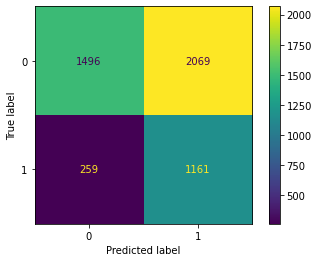

In [193]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = text_analysis_quality["Full_or_Not"]
y_pred = text_analysis_quality["full_key_word_count"]
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [194]:
y_pred.value_counts()

1    3230
0    1755
Name: full_key_word_count, dtype: int64

In [195]:
y_true.value_counts()

0    3565
1    1420
Name: Full_or_Not, dtype: int64

### Initially Change 1 to zero for full_key_word_count which = 1 and ParameterValueID != 7510
<br> We have confidence that this is the case as a gully cannot be blocked and full up with debris as well the measured fullness not being 75-100% 

In [196]:
for index, row in text_analysis_quality.iterrows():
    if row["full_key_word_count"] > 0 and row["ParameterValueID"] != '7510':
            text_analysis_quality.loc[index, "full_key_word_count"] = 0


/home/tgraham/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [77]:
for item in text_analysis_quality[(text_analysis_quality["ParameterValueID"]=='7510')&(text_analysis_quality["full_key_word_count"] == 0)]["Notes"][0:50]:
    print(item)

Clean test and prove gullies. Remove thermoplastic from the gully tops for them to be opened to carry out maintenance.  Renew any gully frames and lids that are seized Please provide photo evidence of any gullies that are filled with tarmac and road plainings. 
Replace missing gully lid. Will require breaking out kerb to install new size gully. Remove ID cone from site once works are complete.  SEE PICTURE ATTACHED FOR DEFECT
Investigate flooding problem & rectify if possible. If not produce a report on the issues,.
Reset / replace gully frame & lid & patch surfacing. 1M x 1M  x 100mm. L1 closure
NS Gulley grating (split triangle) broken  (500mm x 500mm) - requires replacing (DR: Loose/Rocking Cover)
Perm repair: replace drainage cover. Has been made safe and marked with cone.
IN: Drainage Systems - 2 DRAINS + CHAMBER THAT NEEDS CLEARING - THE CHAMBER HAS A YELLOW SANDBAG AND THE DRAINS HAVE DEBRIS ON THEM - NEEDS CLEARING FOR THE INCOMING RAINS  (Enquiry 37108196)
Free flow impeded in

### Due to us now having a validation mechanism of the % full we can cast a winder net to capture more full gullies with the new confidence that a gully will not be classified as full if it is not between 75-100% full

In [197]:
key_words_covered = ["covered","leaves","Covered","Leaves","Clear","clear","CLEAR","cleared","CLEARED","clearing","cleaning","top blocked","Cleaning","mouth","mouths",
                     "debris","Debris","swept","Sweep","SWEPT","SWEEP","sweep","uncover","Uncover","grate","Obstruction","obstructed","detritus","Detritus","DETRITUS",
                     "Free flow impeded","Fix now","leaf","leaves","Fall","fall","Clear blocked gully grating","clear covers","Clear gully cover","Blocked gully tops"]
key_words_full = ["empty","Empty","emptying","Emptying","gully cleaning","cleansing","cleaning out","jet","Jet","jetted","Jetted","Jetting","sucking","Sucking","sucker","SUCKER",
                 "sucked","Sucked","Suck","SUCK","suck","vac","blocked","Blocked","blockage","Blockage","unblock","Unblock","blocking","Blockage","Silt","silted","silt","Clean out gully","Flooding","flooding","filled","Soil"
                 ,"Cleared","debris","Debris","clearing","detritus","cleaning","CLEARING","FLOOD","BLOCKED","Standing water","standing","Please clear 8 gullies","full of mud"]
key_words_broken = ["collapsing","sunken","Collapsing","Sunken","Reset","reset","re-setting","Broken","broken","replace",
                    "Replace","collapsed","Collapsed","COLLAPSED","pothole","Pothole","POTHOLE","RESET","fit","Fit","FIT",
                   "Adjust","ADJUST","adjust","repair","Repair","missing","Missing","replacing","Replace","REPLACE","REPLACING",
                   "cracked","Cracked","CRACKED","Sandbag","sandbag","Sandbags","SANDBAG","breaking","Breaking","dislodged","Dislodged","misaligned",
                   "Misaligned","degraded","Degraded","frame","Frame","Rattling","rattling","REPAIR","setting","Setting","re-set","Raise",
                    "Hole","hole","patch","Patch","damage","Damage","rocking","Rocking","sunk","Sunk","SUNK","CCTV","cctv","reseating","collapse",
                   "Reinstate","level with","Level with","unseize","seize","Unseize","Seize","broken","New gully lid required","no lid","No lid","lid open","Lid popped out"]

text_analysis_quality["covered_key_word_count"] = 0
text_analysis_quality["full_key_word_count"] = 0
text_analysis_quality["broken_key_word_count"] = 0 
count = 0
for item in reactive_data["Notes"]:
    count += 1
    count_of_covered_key_words=0
    for key_word in key_words_covered:
        if item.find(key_word) != -1:
            count_of_covered_key_words += 1
    text_analysis_quality.loc[text_analysis_quality["Notes"] == item, "covered_key_word_count"] = count_of_covered_key_words

    count_of_full_key_words=0
    for key_word in key_words_full:
        if item.find(key_word) != -1:
            count_of_full_key_words += 1
    text_analysis_quality.loc[text_analysis_quality["Notes"] == item, "full_key_word_count"] = count_of_full_key_words
    
    count_of_broken_key_words=0
    for key_word in key_words_broken:
        if item.find(key_word) != -1:
            count_of_broken_key_words += 1
    text_analysis_quality.loc[text_analysis_quality["Notes"] == item, "broken_key_word_count"] = count_of_broken_key_words

    if count % 1000 == 0 :
        print(count)

/tmp/ipykernel_42849/55841440.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_analysis_quality["covered_key_word_count"] = 0
/tmp/ipykernel_42849/55841440.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_analysis_quality["full_key_word_count"] = 0
/tmp/ipykernel_42849/55841440.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

1000
2000
3000
4000


In [198]:
for item in text_analysis_quality[(text_analysis_quality["ParameterValueID"]=='7510')&(text_analysis_quality["full_key_word_count"] == 0)]["Notes"][0:500]:
    print(item)

Replace missing gully lid. Will require breaking out kerb to install new size gully. Remove ID cone from site once works are complete.  SEE PICTURE ATTACHED FOR DEFECT
Reset / replace gully frame & lid & patch surfacing. 1M x 1M  x 100mm. L1 closure
NS Gulley grating (split triangle) broken  (500mm x 500mm) - requires replacing (DR: Loose/Rocking Cover)
Perm repair: replace drainage cover. Has been made safe and marked with cone.
Kerb gully requires reseating, hexagon locking key required. This is the 8th gully out of nine counting from the start of the layby. AWS sign at start of layby. (Drainage Defect)
12 x OFFSIDE gullies *in flood check area* badly affected by recent leaf fall, scraping of 12 x gully tops or 600 metres of offside kerb sweeping required to ensure free flow is restored L4C3=12 - 28 days (Drainage Defect)
GULLYS COVERED NOT LETTING WATER BE RELEASED 17 GULLYS TO BE SWEPT OF DEBRIS/SILT AND LEAVES  AND DISPOSED OF WASTE C = MEDIUM L = MEDIUM (Drainage Defect)
Broken a

### I am happy that none of the above have the failure mode of gully full

### Investigate Covered Failure Modes
<br> 1. If an event has a covered key word count greater than 2 then we will be pretty confident that the gully was covered
<br> 2. The FIX NOW priority indicates that an inspector swept the gully or put the lid back on - ie they don't have the ability to empty a full drain.
<br> 3. If there is a FIX NOW priority and one or more key words then we can confidently classify it as a covered failure

In [199]:
text_analysis_quality[(text_analysis_quality["covered_key_word_count"] > 0)&(text_analysis_quality["ParameterValueID"]!="7510")&(text_analysis_quality["PriorityID"]=='FNOW')]

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,covered_key_word_count,full_key_word_count,broken_key_word_count,Full_or_Not
23,12007341,A12GU00006623,2022-09-21 13:59:57.0000000,Gully top blocked. Cleared with fix now (Drain...,0,Work Complete,FNOW,Fix Now - Internal,2022-09-21 14:00:31.0000000,NO87,%FUL,CLEA,2023-04-21 10:59:09.627,1,2,2,0,0
24,12007659,A12GU00023573,2022-10-10 10:14:02.0000000,Partially blocked gully top. Cleared with fix ...,0,Work Complete,FNOW,Fix Now - Internal,2022-10-10 10:14:47.0000000,NO09,%FUL,CLEA,2023-04-21 10:59:09.627,1,1,2,0,0
25,12007661,A12GU00023583,2022-10-10 10:24:59.0000000,Partially blocked gully top. Fix now (Drainage...,0,Work Complete,FNOW,Fix Now - Internal,2022-10-10 10:25:25.0000000,NO09,%FUL,CLEA,2023-04-21 10:59:09.627,1,1,1,0,0
28,12008437,A12GU00027932,2022-12-12 13:38:20.0000000,Gully covered in debris (Drainage Defect),0,Work Complete,FNOW,Fix Now - Internal,2022-12-12 14:24:07.0000000,NO89,%FUL,NK,2023-04-21 10:59:09.627,1,2,1,0,0
29,12008439,A12GU00027932,2022-12-12 13:45:39.0000000,Clear top of gully (Drainage Defect),0,Work Complete,FNOW,Fix Now - Internal,2022-12-12 13:46:48.0000000,NO89,%FUL,CLEA,2023-04-21 10:59:09.627,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533629,54077389,A21DRGU/031447,2023-02-01 09:01:19.0000000,Cleared debris off x7 gully lids (Drainage Def...,1,Work Complete,FNOW,Fix Now - Internal,2023-02-01 09:01:39.0000000,3001,%FUL,0-25,2023-04-21 10:59:09.627,1,2,2,0,0
533630,54077447,A21DRGU/007340,2023-02-03 09:39:06.0000000,X2 gully lids covered with silt and rubbish (D...,1,Work Complete,FNOW,Fix Now - Internal,2023-02-03 09:39:55.0000000,3803,%FUL,0-25,2023-04-21 10:59:09.627,1,1,1,0,0
533633,54078123,A21DRGU/002307,2023-02-27 09:34:35.0000000,X6 gullys covered with silt (Drainage Defect),0,Work Complete,FNOW,Fix Now - Internal,2023-02-27 09:35:56.0000000,3803,%FUL,2550,2023-04-21 10:59:09.627,1,1,1,0,0
534363,54273983,A21DRGU/004804,2023-04-13 08:25:23.0000000,2x gullies cleared (Drainage Defect),0,Work Complete,FNOW,Fix Now - Internal,2023-04-13 08:25:46.0000000,3803,%FUL,0-25,2023-04-21 10:59:09.627,1,2,0,0,0


### We can use FixNow to classify covered drainage where %ful is clear or < 7510 --- Pick up here - incorporate below 

# End of Analysis - Implementation

## Create Data Pipeline

In [417]:
interventions = pd.read_csv("../project_data/interventions_dataset.csv",names=[
"JobID"
,"CentralAssetID"
,"SiteID"
,"PlotNo"
,"AssetTypeID"
,"LogNo"
,"EntryDateTime"
,"Notes"
,"JobTypeID"
,"JobTypeCode"
,"JobTypeName"
,"JobStatusID"
,"FloodHotspot"
,"JobStatusName"
,"PriorityID"
,"PriorityName"
,"ActualStartingDateTime"
,"ActualCompletionDateTime"
,"ActualCompletionYearMonth"
,"RouteID"
,"ParameterTypeID"
,"ParameterValueID"
,"IsDeletedFlag"
,"IsCurrentFlag"
,"ValidFromDateTime"
,"ValidToDateTime"
,"InsertedDateTime"
,"JobItemID"
,"SorItemID"
,"ExtractTimestamp"],header=None,index_col=False)
def formatting_failure_vs_maintenance(string): 
    if string.find("B") != -1:
        return 1
    else:
        return 0

interventions["Failure_or_Maintenance"] = interventions["JobTypeCode"].apply(formatting_failure_vs_maintenance)

def create_prefix(siteid):
    return siteid[0:4]

interventions["prefix"] = interventions["SiteID"].apply(create_prefix)
interventions = interventions[(interventions["IsCurrentFlag"]==1)&(interventions["IsDeletedFlag"]==0)]
interventions = interventions.groupby(['JobID', 'CentralAssetID','EntryDateTime','Notes','FloodHotspot', 'JobStatusName', 'PriorityID',
       'PriorityName','ActualCompletionDateTime', 'RouteID', 'ParameterTypeID',
       'ParameterValueID', 'ExtractTimestamp', 'Failure_or_Maintenance','prefix'],as_index=False)["ValidFromDateTime"].max()
interventions.drop(columns="ValidFromDateTime",inplace=True)

/home/tgraham/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [418]:
reactive = interventions[interventions["Failure_or_Maintenance"]==1]
key_words_covered = ["covered","leaves","Covered","Leaves","Clear","clear","CLEAR","cleared","CLEARED","clearing","cleaning","top blocked","Cleaning","mouth","mouths",
                     "debris","Debris","swept","Sweep","SWEPT","SWEEP","sweep","uncover","Uncover","grate","Obstruction","obstructed","detritus","Detritus","DETRITUS",
                     "Free flow impeded","Fix now","leaf","leaves","Fall","fall","Clear blocked gully grating","clear covers","Clear gully cover","Blocked gully tops",
                     "Grass growing","Drainage Defect","mud","clean","free flow"]

key_words_full = ["empty","Empty","emptying","Emptying","gully cleaning","cleansing","cleaning out","jet","Jet","jetted","Jetted","Jetting","sucking","Sucking","sucker","SUCKER",
                 "sucked","Sucked","Suck","SUCK","suck","vac","blocked","Blocked","blockage","Blockage","unblock","Unblock","blocking","Blockage","Silt","silted","silt",
                  "Clean out gully","Flooding","flooding","filled","Soil", "Cleared","debris","Debris","clearing","detritus","cleaning","CLEARING","FLOOD","BLOCKED",
                  "Standing water","standing","Please clear 8 gullies","full of mud"]

key_words_broken = ["collapsing","sunken","Collapsing","Sunken","Reset","reset","re-setting","Broken","broken","replace",
                    "Replace","collapsed","Collapsed","COLLAPSED","pothole","Pothole","POTHOLE","RESET","fit","Fit","FIT",
                   "Adjust","ADJUST","adjust","repair","Repair","missing","Missing","replacing","Replace","REPLACE","REPLACING",
                   "cracked","Cracked","CRACKED","Sandbag","sandbag","Sandbags","SANDBAG","breaking","Breaking","dislodged","Dislodged","misaligned",
                   "Misaligned","degraded","Degraded","frame","Frame","Rattling","rattling","REPAIR","setting","Setting","re-set","Raise",
                    "Hole","hole","patch","Patch","damage","Damage","rocking","Rocking","sunk","Sunk","SUNK","CCTV","cctv","reseating","collapse",
                   "Reinstate","level with","Level with","unseize","seize","sieze","Unseize","Seize","broken","New gully lid required","no lid","No lid",
                    "lid open","Lid popped out","realingning","stick out","dislodge","Re-set"]

reactive["covered_key_word_count"] = 0
reactive["full_key_word_count"] = 0
reactive["broken_key_word_count"] = 0 
count = 0
for item in reactive["Notes"]:
    count += 1
    count_of_covered_key_words=0
    for key_word in key_words_covered:
        if item.find(key_word) != -1:
            count_of_covered_key_words += 1
    reactive.loc[reactive["Notes"] == item, "covered_key_word_count"] = count_of_covered_key_words

    count_of_full_key_words=0
    for key_word in key_words_full:
        if item.find(key_word) != -1:
            count_of_full_key_words += 1
    reactive.loc[reactive["Notes"] == item, "full_key_word_count"] = count_of_full_key_words
    
    count_of_broken_key_words=0
    for key_word in key_words_broken:
        if item.find(key_word) != -1:
            count_of_broken_key_words += 1
    reactive.loc[reactive["Notes"] == item, "broken_key_word_count"] = count_of_broken_key_words

    if count % 1000 == 0 :
        print(count)

/tmp/ipykernel_42849/3702950441.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive["covered_key_word_count"] = 0
/tmp/ipykernel_42849/3702950441.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive["full_key_word_count"] = 0
/tmp/ipykernel_42849/3702950441.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

1000
2000
3000
4000


## Create Validation Columns

In [419]:
reactive["full_failure"] = reactive["full_key_word_count"]
reactive["covered_failure"] = reactive["covered_key_word_count"]
reactive["broken_failure"] = reactive["broken_key_word_count"]

/tmp/ipykernel_42849/3847258014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive["full_failure"] = reactive["full_key_word_count"]
/tmp/ipykernel_42849/3847258014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive["covered_failure"] = reactive["covered_key_word_count"]
/tmp/ipykernel_42849/3847258014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

## Apply validation rules

In [420]:
for index, row in reactive.iterrows():
    if row["covered_key_word_count"] > 0 and row["PriorityID"]=='FNOW' and row["full_key_word_count"] >0:
        reactive.loc[index, "full_failure"] = 0
        
    if row["covered_key_word_count"] == 0 and row["PriorityID"]=='FNOW' and row["full_key_word_count"] > 0:
        reactive.loc[index, "covered_failure"] = 1 
        
    #if row["covered_key_word_count"] == 1 and row["PriorityID"]!='FNOW':
    #    reactive.loc[index, "covered_failure"] = 0
        
    if row["PriorityID"]=='FNOW' and row["broken_key_word_count"] > 0:
        reactive.loc[index, "broken_failure"] = 1
        
    if row["full_key_word_count"] > 0 and row["ParameterValueID"] == 'NK':
        reactive.loc[index,"ParameterValueID"] = '7510'
    
    if row["full_key_word_count"] > 0 and row["ParameterValueID"] not in ('7510','NK'):
        reactive.loc[index, "full_failure"] = 0
        reactive.loc[index, "covered_failure"] = 1
    

In [422]:
def adjust_word_count_to_binary(x):
    if x > 1: 
        return 1 
    else:
        return x 
    
reactive["covered_failure"] = reactive["covered_failure"].apply(adjust_word_count_to_binary)
reactive["full_failure"] = reactive["full_failure"].apply(adjust_word_count_to_binary)
reactive["broken_failure"] = reactive["broken_failure"].apply(adjust_word_count_to_binary)

/tmp/ipykernel_42849/1046574324.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive["covered_failure"] = reactive["covered_failure"].apply(adjust_word_count_to_binary)
/tmp/ipykernel_42849/1046574324.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactive["full_failure"] = reactive["full_failure"].apply(adjust_word_count_to_binary)
/tmp/ipykernel_42849/1046574324.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [423]:
reactive.drop(columns=["covered_key_word_count","full_key_word_count","broken_key_word_count"],inplace=True)

/home/tgraham/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [424]:
cyclic = interventions[interventions["Failure_or_Maintenance"]==0]
cyclic["full_failure"] = 0
cyclic["covered_failure"] = 0
cyclic["broken_failure"] = 0

/tmp/ipykernel_42849/2830057744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclic["full_failure"] = 0
/tmp/ipykernel_42849/2830057744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclic["covered_failure"] = 0
/tmp/ipykernel_42849/2830057744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [425]:
final_interventions = pd.concat([reactive,cyclic])

## Sense test below to randomly check the quality of the final classification

In [393]:
final_interventions[final_interventions["Failure_or_Maintenance"]==1].sample(n=25)

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure
97284,41733258,A07DRGU/037213,2020-02-18 12:13:02.0000000,LE. Clear 11no gully aprons (DR:Impeded water ...,1,Job Closed,28DY,28 days,2020-02-20 03:55:39.0000000,R05,%FUL,7510,2023-04-21 10:59:09.627,1,MD07,1,1,0
448476,49169423,DR/A09/GU/013457,2023-02-15 12:05:07.0000000,Customer complaint 1 x 600mm x 600mm gully cha...,1,Work Complete,28DY,28 days,2023-02-17 13:55:13.0000000,A919,%FUL,7510,2023-04-21 10:59:09.627,1,MD09,1,1,0
447394,49137311,DR/A09/GU/048932,2021-11-03 21:04:13.0000000,Gully top covered in detritus (DR: Free flow i...,0,Work Complete,FNOW,Fix Now - Internal,2021-11-03 21:05:47.0000000,A911,%FUL,5075,2023-04-21 10:59:09.627,1,MD09,0,1,0
447620,49144270,DR/A09/GU/026519,2022-03-08 08:04:14.0000000,Gully requires emptying (DR: Blockage),1,Job Closed,PAD1,PAD: Non Safety - High,2022-03-08 08:03:00.0000000,A941,%FUL,7510,2023-04-21 10:59:09.627,1,MD09,1,0,0
292352,43232794,A07DRGU/065976,2021-10-15 11:47:43.0000000,LE. Replace gully grate and frame (DR: Grating...,0,Job Closed,7DY,7 days,2021-10-25 03:01:25.0000000,R05,%FUL,2550,2023-04-21 10:59:09.627,1,MD07,0,1,1
448281,49156164,19018098,2022-10-05 08:19:09.0000000,Blocked gully (Drainage Defect),0,Substantiation Passed,3MON,3 Months,2022-11-02 23:39:36.0000000,A908,%FUL,7510,2023-04-21 10:59:09.627,1,MD09,1,1,0
961,40410224,DRGU/A04/P00022445,2021-11-18 12:00:35.0000000,Collapsed gully nearside water channel Take ou...,0,Work Complete,28DY,28 days,2022-02-04 02:30:00.0000000,4153,%FUL,NK,2023-04-21 10:59:09.627,1,SE04,0,0,1
186300,42276052,A21DRGU/035637,2020-10-06 15:25:19.0000000,Blocked gully x27 (DR: Blockage),1,Work Complete,FNOW,Fix Now - Internal,2020-10-06 15:25:15.0000000,3035,%FUL,7510,2023-04-21 10:59:09.627,1,SW21,1,1,0
533506,54071639,A21DRGU/073132,2022-07-15 11:21:30.0000000,Crew are to replace the D400 Side entry gully ...,0,Post Compl Inspection Passed,28DY,28 days,2022-07-22 13:54:28.0000000,M502,%FUL,7510,2023-04-21 10:59:09.627,1,SW21,0,0,1
447459,49139203,DR/A09/GU/068040,2021-12-14 10:58:51.0000000,Temporary repairs to collapsing gully failed. ...,1,Work Complete,24HC,24 Hours - Commit,2021-12-14 15:02:49.0000000,A909,%FUL,7510,2023-04-21 10:59:09.627,1,MD09,0,0,1


In [426]:
final_interventions = final_interventions.drop(columns=["Notes","JobStatusName","PriorityID","PriorityName","ParameterTypeID","EntryDateTime"])

In [427]:
final_interventions

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure
0,12000016,A12SDRGU00004594,0,2021-06-19 08:07:55.0000000,NO76,7510,2023-04-21 10:59:09.627,1,NE12,1,0,0
1,12002351,A12GU00010060,0,2021-11-09 04:03:52.0000000,NO96,0-25,2023-04-21 10:59:09.627,1,NE12,0,0,1
2,12002726,A12GU00019535,0,2021-11-24 14:18:34.0000000,NO87,2550,2023-04-21 10:59:09.627,1,NE12,0,1,1
3,12002785,A12GU00011223,0,2021-12-08 07:31:56.0000000,NO87,NK,2023-04-21 10:59:09.627,1,NE12,0,0,1
4,12003189,A12GU00005763,0,2022-07-26 01:01:43.0000000,NO41,7510,2023-04-21 10:59:09.627,1,NE12,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
568710,58156828,DR/HEA10/DRGU/043753,0,2023-04-02 22:21:00.0000000,M128,2550,2023-04-21 10:59:09.627,0,NW10,0,0,0
568711,58156829,DR/HEA10/DRGU/043747,0,2023-04-02 22:37:09.0000000,M128,2550,2023-04-21 10:59:09.627,0,NW10,0,0,0
568712,58156830,DR/HEA10/DRGU/043748,0,2023-04-02 22:36:46.0000000,M128,2550,2023-04-21 10:59:09.627,0,NW10,0,0,0
568713,58156831,DR/HEA10/DRGU/043746,0,2023-04-02 22:37:33.0000000,M128,2550,2023-04-21 10:59:09.627,0,NW10,0,0,0


In [433]:
from datetime import date
from dateutil.relativedelta import relativedelta
from dateutil import parser

## Pick up below - failure in 6 months etc 

In [436]:
for name, group in final_interventions[0:200].groupby("CentralAssetID"):
    if len(group["ActualCompletionDateTime"]) == 1:
        if parser.parse(min(group["ActualCompletionDateTime"])) + relativedelta(months=+6) < parser.parse(min(group["ExtractTimestamp"])):
            print("here")

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


### For cyclic maintenance activities I want to keep the ActualCompletionDateTime as the only date. 
### For Reactive maintenance activities I want to keep the first instance of it as that is the first date when the failure was realised
### If one value of the % full values is null then we need to infill that as it should be the same as its one asset and one intervention -- SOLVED -- Turns out IsCurrentFlag was set to 0 for some causing duplicates - Solved with the line below 

### If 'cyclic' interventions are performed at random, then you can simply compare the outcomes of 'cyclic' intervention versus the outcomes of 'reactive' intervention over a fixed period of time that would be meaningful. The plot below shows that there is more cyclic maintenance in the spring summer and autumn months compared to the winter months. It could be valuable to add a "Season" variable

<AxesSubplot: xlabel='ActualCompletionDateTime'>

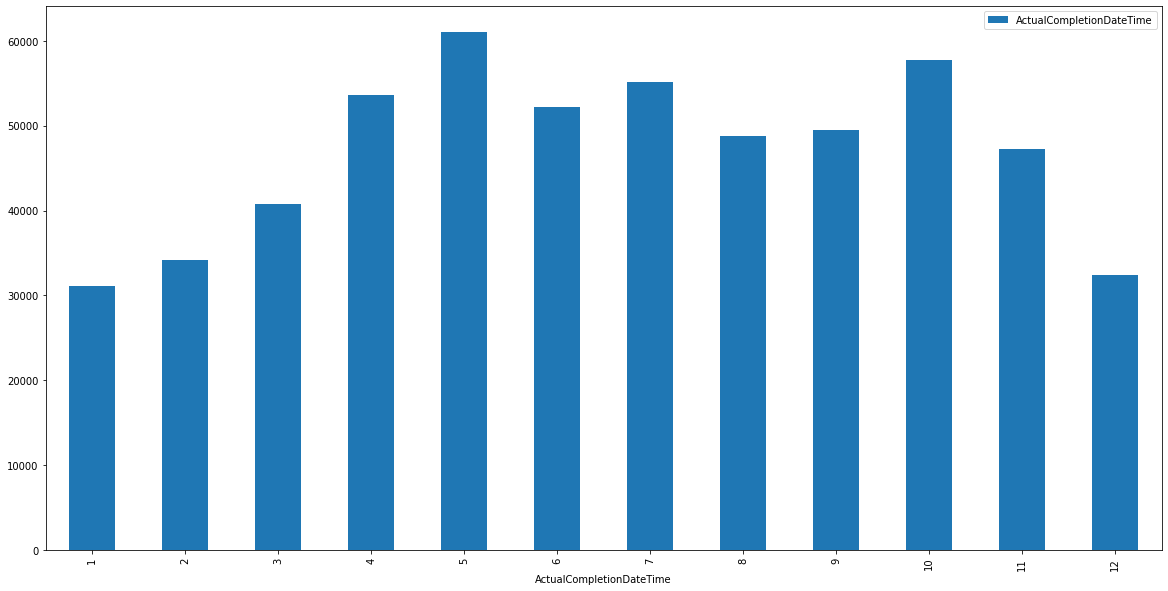

In [407]:
import matplotlib.pyplot as plt 
x = interventions[interventions["Failure_or_Maintenance"]==0][["ActualCompletionDateTime"]]
x["ActualCompletionDateTime"] = x["ActualCompletionDateTime"].astype("datetime64")
x.groupby(x["ActualCompletionDateTime"].dt.month).count().plot(kind="bar",figsize=(20,10))

### Import Meaning of the Percentage Full Parameter Values

### Full drains can be verified by the percentage full numbers

In [58]:
ref_dict = {'ParameterValueID':['2550','NK','CLEA','0-25','N/A','7510','5075']
,'Name':['25 - 50% Full','Change Me','Clear','0 - 25% Full','Non Applicable','75 - 100% Full','50 - 75 % Full']}

In [59]:
ref_table = pd.DataFrame(ref_dict)

In [60]:
ref_table

,ParameterValueID,Name
0,2550,25 - 50% Full
1,NK,Change Me
2,CLEA,Clear
3,0-25,0 - 25% Full
4,N/A,Non Applicable
5,7510,75 - 100% Full
6,5075,50 - 75 % Full


## Process Attributes

In [61]:
attributes.columns

Index(['CentralAssetID', 'AttrHD52', 'AttrHD41', 'AttrHD39', 'AttrHD57',
       'AttrHD51', 'AttrHD76', 'AttrHD14', 'AttrHD06', 'AttrHD13', 'AttrHD16',
       'AttrHD17', 'AttrHD07', 'AttrHD19', 'AttrXSP', 'AttrHD05', 'AttrHD04',
       'ExtractTimestamp'],
      dtype='object')

In [62]:
attributes = attributes.drop(columns=["SiteID","PlotNo","AttrNameHD5",
                         "AttrNameHD41","AttrNameHD39","AttrNameHD57",
                         "AttrNameHD51","AttrNameHD76","AttrNameHD14",
                         "AttrNameHD06","AttrNameHD13","AttrNameHD16",
                        "AttrNameHD17","AttrNameHD07","AttrNameHD19",
                        "AttrNameXSP","AttrNameHD05","AttrNameHD04"])

KeyError: "['SiteID' 'PlotNo' 'AttrNameHD5' 'AttrNameHD41' 'AttrNameHD39'\n 'AttrNameHD57' 'AttrNameHD51' 'AttrNameHD76' 'AttrNameHD14'\n 'AttrNameHD06' 'AttrNameHD13' 'AttrNameHD16' 'AttrNameHD17'\n 'AttrNameHD07' 'AttrNameHD19' 'AttrNameXSP' 'AttrNameHD05' 'AttrNameHD04'] not found in axis"

In [63]:
attributes

,CentralAssetID,AttrHD52,AttrHD41,AttrHD39,AttrHD57,AttrHD51,AttrHD76,AttrHD14,AttrHD06,AttrHD13,AttrHD16,AttrHD17,AttrHD07,AttrHD19,AttrXSP,AttrHD05,AttrHD04,ExtractTimestamp
0,DR/A03/GU/002084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
1,DR/A03/GU/001632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
2,DR/A03/GU/022092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
3,DR/A03/GU/001187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
4,DR/A03/GU/014372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412600,A21DRGU/111880,NaN,NaN,NaN,NaN,NaN,NaN,PC,NaN,N,RE,H,NaN,Y,L,HA,SW,2023-04-21 11:01:34.847
412601,A21DRGU/031554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,NaN,NaN,2023-04-21 11:01:34.847
412602,A21DRGU/031570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,NaN,NaN,2023-04-21 11:01:34.847
412603,A21DRGU/034946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,NaN,2023-04-21 11:01:34.847


In [65]:
len(attributes.CentralAssetID.unique())

412589

In [100]:
import numpy as np

In [113]:
def count_data(row):
    count =0 
    for column in row[1:17]:
        if column == column:
            count += 1 
    return count
            #if column != 'nan':   print(type(column))

In [115]:
attributes["amount_of_data"] = attributes.apply(lambda x: count_data(x),axis=1)

In [122]:
a = attributes.groupby("CentralAssetID",as_index=False)["amount_of_data"].max()

In [127]:
attributes = pd.merge(a,attributes, on=["CentralAssetID","amount_of_data"], how= "left")

In [132]:
attributes = attributes.drop(columns='amount_of_data')

In [133]:
len(attributes.CentralAssetID.unique())

412589

In [130]:
attribute_names = {"AttributeTypeID":["HD41",
"HD76",
"HD39",
"HD19",
"HD14",
"HD51",
"HD05",
"HD16",
"XSP",
"HD17",
"HD13",
"HD04",
"HD57",
"HD06",
"HD07",
"HD52"],
"AttributeName":["Chamber Shape",
                "Construction year in YYYY",
                "Asset cleaned prior to insp",
                "Grating",
                "Manhole Construction Type",
                "Sump",
                "Drainage Owner",
                "Chamber Shape",
                "XSP Code",
                "Cover Duty",
                "Is Side Entry in item Y/N",
                "Drainage System Type",
                "Cover or grating hinged Y/N",
                "Strategic Drain",
                "Location Type Code",
                "Trapped Gully Outlet"],
"AttributeDescription":["ADMM  Inventory - The shape code of the chamber cross-section"
,"NULL"
,"NULL"
,"ADMM  Inventory - Indicates the presence of a grating"
,"ADMM  Inventory - Manhole construction type"
,"ADMM  Inventory - Indicates presence of sump"
,"ADMM  Operational - The owner of the item"
,"ADMM  Inventory - The shape code of the cover"
, "ADMM  Inventory - Defines the location of the asset across the carriageway"
,"ADMM  Inventory - The duty of the cover"
,"NULL"
,"ADMM  Inventory - The type of drainage system"
,"ADMM  Inventory - Indicates whether the cover (or grating) is hinged"
,"NULL"
,"ADMM  Inventory - Location type code"
,"ADMM  Inventory - Gully outlet is trapped"]}

In [131]:
attribute_names_df = pd.DataFrame(attribute_names)
attribute_names_df

,AttributeTypeID,AttributeName,AttributeDescription
0,HD41,Chamber Shape,ADMM Inventory - The shape code of the chambe...
1,HD76,Construction year in YYYY,NULL
2,HD39,Asset cleaned prior to insp,NULL
3,HD19,Grating,ADMM Inventory - Indicates the presence of a ...
4,HD14,Manhole Construction Type,ADMM Inventory - Manhole construction type
5,HD51,Sump,ADMM Inventory - Indicates presence of sump
6,HD05,Drainage Owner,ADMM Operational - The owner of the item
7,HD16,Chamber Shape,ADMM Inventory - The shape code of the cover
8,XSP,XSP Code,ADMM Inventory - Defines the location of the ...
9,HD17,Cover Duty,ADMM Inventory - The duty of the cover


### Join the data

In [134]:
attributes

,CentralAssetID,AttrHD52,AttrHD41,AttrHD39,AttrHD57,AttrHD51,AttrHD76,AttrHD14,AttrHD06,AttrHD13,AttrHD16,AttrHD17,AttrHD07,AttrHD19,AttrXSP,AttrHD05,AttrHD04,ExtractTimestamp
0,00000000001000000147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
1,00000000001000000148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
2,00000000001000000149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
3,00000000001000000150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
4,00000000001000000151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412584,eastAB/DRGU/0631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
412585,eastAB/DRGU/0632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
412586,eastAB/DRGU/0633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847
412587,eastAB/DRGU/0634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21 11:01:34.847


In [141]:
interventions

,JobID,CentralAssetID,SiteID,PlotNo,AssetTypeID,LogNo,EntryDateTime,Notes,JobTypeID,JobTypeCode,...,ParameterTypeID,ParameterValueID,IsDeletedFlag,IsCurrentFlag,ValidFromDateTime,ValidToDateTime,InsertedDateTime,JobItemID,SorItemID,ExtractTimestamp
0,42887971,DRGU/014058,NW13000193,260022.0,DRGU,7,2021-11-05 00:00:00.0000000,4.3.1 Clean empty gullies - verge A66 Link 2 C...,12,A08,...,%FUL,2550,0,1,2021-12-06 00:00:00.0000000,9999-12-31 00:00:00.0000000,2021-12-06 07:06:48.8066667,20.0,A4.3.1.1,2023-04-21 10:59:09.627
1,42245464,A21DRGU/056579,SW21001920,260435.0,DRGU,6,2020-07-21 00:00:00.0000000,Nov - Jan: (DR: Gullies - clear covers - RLO...,12,A08,...,%FUL,2550,0,1,2021-03-15 20:37:00.0000000,9999-12-31 00:00:00.0000000,2021-03-16 06:30:15.2766667,10.0,A4.3.1.2,2023-04-21 10:59:09.627
2,42243698,A21DRGU/110486,SW21001668,260168.0,DRGU,6,2020-07-21 00:00:00.0000000,Nov - Jan: (DR: Gullies - clear covers - RLOS 2),12,A08,...,%FUL,NaN,0,1,2021-10-20 00:00:00.0000000,9999-12-31 00:00:00.0000000,2021-10-20 12:49:14.4200000,10.0,A4.3.1.2,2023-04-21 10:59:09.627
3,42305555,A21DRGU/012776,SW21000794,260004.0,DRGU,7,2020-12-11 00:00:00.0000000,DR: Gullies - clear covers - RLOS 2,12,A08,...,%FUL,CLEA,0,1,2021-03-18 10:12:26.0000000,9999-12-31 00:00:00.0000000,2021-03-19 06:24:49.2500000,10.0,A4.3.1.2,2023-04-21 10:59:09.627
4,42245486,A21DRGU/056488,SW21001920,260647.0,DRGU,6,2020-07-21 00:00:00.0000000,Nov - Jan: (DR: Gullies - clear covers - RLO...,12,A08,...,%FUL,2550,0,1,2021-03-15 21:22:39.0000000,9999-12-31 00:00:00.0000000,2021-03-16 06:30:15.2766667,10.0,A4.3.1.2,2023-04-21 10:59:09.627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022558,58100499,DR/HEA10/DRGU/037501,NW10001791,260018.0,DRGU,7,2022-04-12 00:00:00.0000000,"4.3.1.1 Gullies; gully emptying, including cle...",12,A08,...,%FUL,NK,0,0,2022-04-13 00:00:00.0000000,2022-09-02 23:59:59.0000000,2022-04-13 06:15:29.7800000,NaN,NaN,2023-04-21 10:59:09.627
1022559,46428047,A68DRGU/038025,EA68002592,260013.0,DRGU,8,2022-02-16 00:00:00.0000000,4.3.1.2 Clean Covers and Clear Obstructions 20...,12,A08,...,%FUL,NK,0,0,2022-02-17 00:00:00.0000000,2022-07-04 23:59:59.0000000,2022-02-17 07:14:26.7966667,NaN,NaN,2023-04-21 10:59:09.627
1022560,49695855,DRGU/A04/P00001921,SE04000113,260083.0,DRGU,9,2021-03-31 07:51:57.8270000,Created by Repeating Jobs Agent using Regime: ...,12,A08,...,%FUL,NK,0,0,2021-03-31 07:51:57.8730000,2021-08-04 22:13:57.0000000,2021-04-01 05:39:13.9933333,NaN,NaN,2023-04-21 10:59:09.627
1022561,42414612,A21DRGU/126640,SW21001788,260104.0,DRGU,6,2021-07-27 00:00:00.0000000,Nov - Jan: (DR: Gullies - empty & clear cover...,12,A08,...,%FUL,NK,0,0,2021-10-20 00:00:00.0000000,2022-03-25 23:59:59.0000000,2021-10-20 12:49:14.4200000,NaN,NaN,2023-04-21 10:59:09.627
